In [6]:
import pandas as pd

df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Question 1**

Up to this point, determine the underlying tasks needed to be done for loading and handling the data based on
the steps described in this part?

- First and the very obvious task is to identify which coloumn has missing values and is asked on "question 2."
- After knowing what are those, we need to deliberately think what we could do and conclude in order to guess those blank spots.

In [36]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Question 2**

Which columns contain missing values? Should we remove or fill them?

-Age, Cabin, and Embarked contain missing values. And all of them should be filled in order to obtain utter precision on every person's identity that will help us to infer better conclusions. But if i were to remove either one of them, it would be embarked. Since, every cabin has a designated spot which corresponds to the value they (passengers) paid for their tickets. If they paid for more luxurious rooms, then they must be from rich city then not if they did otherwise. The only thing that embarked could do if ever it was not removed is to tell where they from, but that doesn't matter.

In [8]:
df["Survived"].mean()

0.3838383838383838

Removing Embarked

In [25]:
print("Unique values in Embarked:", df["Embarked"].unique())

print(df.groupby("Embarked")["Pclass"].value_counts())

Unique values in Embarked: ['S' 'C' 'Q' nan]
Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: count, dtype: int64


**Question 3**

What can you deduce on the survival rate of the passengers?


- 38% survived
- Women and children were prioritized.
- Passengers with a recorded cabin had a higher survival rate, likely because they were in first class.



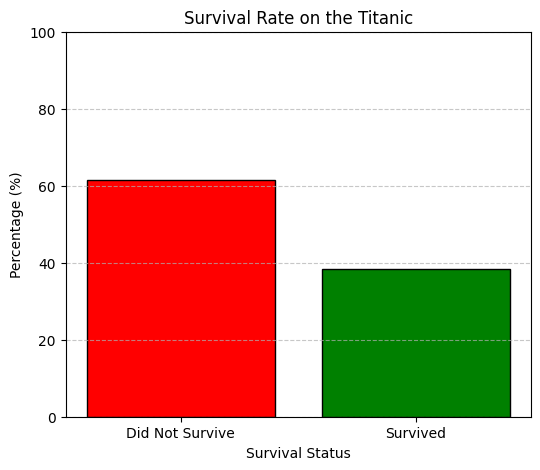

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

survived_count = df["Survived"].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 5))
plt.bar(["Did Not Survive", "Survived"], survived_count, color=["red", "green"], edgecolor="black")
plt.xlabel("Survival Status")
plt.ylabel("Percentage (%)")
plt.title("Survival Rate on the Titanic")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



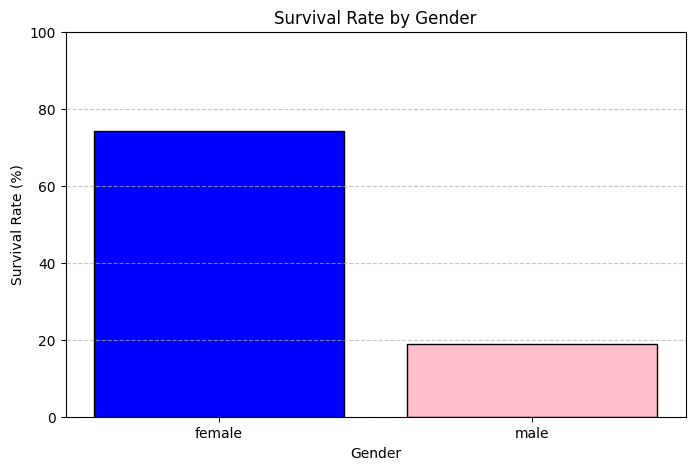

In [34]:
gender_survival = df.groupby("Sex")["Survived"].mean() * 100

plt.figure(figsize=(8, 5))
plt.bar(gender_survival.index, gender_survival, color=["blue", "pink"], edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

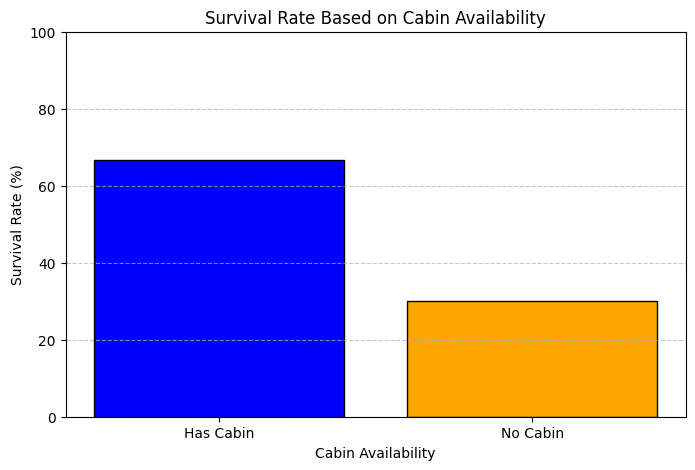

In [35]:
df["HasCabin"] = df["Cabin"].notna()
cabin_survival = df.groupby(df["HasCabin"].map({True: "Has Cabin", False: "No Cabin"}))["Survived"].mean() * 100

plt.figure(figsize=(8, 5))
plt.bar(cabin_survival.index, cabin_survival, color=["blue", "orange"], edgecolor="black")
plt.xlabel("Cabin Availability")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Cabin Availability")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Question 4**

Does age impact survival? How?

-Yes. Logically, the older you are the more difficult it becomes to move.